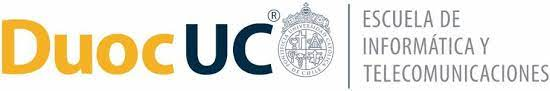

# Proyecto: Caso EducaDL




## Parte 1. Contextualización del proyecto y de los datos.


**PROYECTO EDUCADL**

La empresa EducaDL es una empresa que se dedica al desarrollo de software educativo el proyecto se centrará en crear un sistema basado en Deep learning capaz de dar apoyo a niños de prebásica, para la enseñanza de números en este sistema deberemos ingresar números y el modelo debe reconocer el número dibujado.


---


En la actualidad si analizamos cómo afecta el machine learning e inteligencia artificial en el día a día vemos, que tiene fuertes consecuencias en el ámbito de vida profesional y social, ya que muchas tecnologías que manejamos en nuestros trabajos y nuestros hogares como por ejemplo para el ocio son manejados con machine learning. Cuando prendemos nuestro televisor o usamos el celular para mandar un mensaje tenemos tecnología que está trabajando con modelos de machine learning anticipándose a nuestras necesidades y creando soluciones.


---


Hace un tiempo mucha gente no conocía lo que era el machine learning, Deep learning o Big data pero en la actualidad ya está poblando el vocabulario de la población, incluso de gente que no está involucrada directamente con conocimientos en estas tecnologías podemos ver que la evolución de estas herramientas se actualizan cada día más.


---


La inteligencia artificial la podemos encontrar en las empresas más grandes tales como Google, Facebook, Microsoft. Se puede ver en el reconocimiento de voz, reconocimiento de imágenes, el internet de las cosas y la creciente robotización. Existe el miedo de las personas a que llegara el día en que la tecnología reemplace al ser humano pero la tecnología está creada por y para el ser humano.


## Parte 2. Implementación de Red Feed Fordward Fully Connected (MLP) 


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import tqdm

import random
import time

import tensorflow as tf
import tensorflow_datasets as tfds

import keras
from keras import initializers
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Flatten, Dense, Activation, Input, Dropout

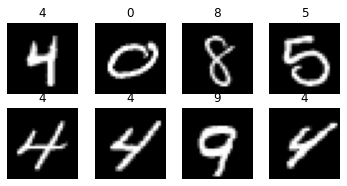

In [ ]:
#Carga set de datos desde tensorflow
#Divimos el dataset en dos, ds_train para realizar los modelos de entrenamiento y ds_test para realizar la validación del modelo.
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

#Relizamos una función para lograr normalizar las imágenes y la llevamos a valores de 0 y 1.
#Ya que al cargar las imágenes, éstas tienen tonalidades entre 0 y 255, y al divir las imágenes en 255 obtenemos valores entre 0 y 1 (0 = Blanco / 255 = negro).
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

#En el set de entrenamiento llevamos la información a la memoria  y le agregamos aleatoriedad, esto permite que en cada epoch, el modelo pueda tomar imágenes distintas.
batch_size = 128
layer1_dense_size = 128
ds_train = ds_train.map(normalize_img, num_parallel_calls = tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(batch_size)#batch de 128 
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

#En este set se realiza algo similar al atenterior pero aquí se quita la aleatoriedad 
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(batch_size) #batch de 128 
ds_test = ds_test.cache()#Las imágenes se guardan en caché
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

#Visualización del dataset
plt.figure(figsize=(6, 6))
for images, labels in ds_train.take(1):
  for i in range(8):
    images_array = np.array(images[i], dtype='float')
    pixels = images_array.reshape((28, 28))
    ax=plt.subplot(4, 4, i + 1)
    plt.imshow(pixels, cmap='gray')
    plt.title(int(labels[i]))
    plt.axis("off")



### Red MLP con ReLu (1, 2 y 3 capas)



In [ ]:
#####################################################################
modelrelu1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
modelrelu1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
) 
start=time.time()
historyrelu1 = modelrelu1.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    verbose=0,
)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutosrelu1 = int(segundos / 60)
restanterelu1 = segundos - (minutosrelu1 * 60)
print(str(minutosrelu1) + " minuto y " + str(restanterelu1) + " segundos" ) 
#####################################################################

0 minuto y 47 segundos


In [ ]:
modelrelu2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
modelrelu2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)
start=time.time()
historyrelu2 = modelrelu2.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    verbose=0,
)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutosrelu2 = int(segundos / 60)
restanterelu2 = segundos - (minutosrelu2 * 60)
print(str(minutosrelu2) + " minuto y " + str(restanterelu2) + " segundos" ) 

0 minuto y 51 segundos


In [ ]:
modelrelu3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
modelrelu3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)
start=time.time()
historyrelu3 = modelrelu3.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    verbose=0,
)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutosrelu3 = int(segundos / 60)
restanterelu3 = segundos - (minutosrelu3 * 60)
print(str(minutosrelu3) + " minuto y " + str(restanterelu3) + " segundos" ) 

1 minuto y 7 segundos



### Red MLP con Tanh (1, 2 y 3 capas)



In [ ]:
#####################################################################
modeltanh1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
modeltanh1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
) 
start=time.time()
historytanh1 = modeltanh1.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    verbose=0,
)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutostanh1 = int(segundos / 60)
restantetanh1 = segundos - (minutostanh1 * 60)
print(str(minutostanh1) + " minuto y " + str(restantetanh1) + " segundos" ) 
#####################################################################

0 minuto y 45 segundos


In [ ]:
#####################################################################
modeltanh2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
modeltanh2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
) 
start=time.time()
historytanh2 = modeltanh2.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    verbose=0,
)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutostanh2 = int(segundos / 60)
restantetanh2 = segundos - (minutostanh2 * 60)
print(str(minutostanh2) + " minuto y " + str(restantetanh2) + " segundos" )
#####################################################################

0 minuto y 54 segundos


In [ ]:
#####################################################################
modeltanh3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
modeltanh3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
) 
start=time.time()
historytanh3 = modeltanh3.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    verbose=0,
)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutostanh3 = int(segundos / 60)
restantetanh3 = segundos - (minutostanh3 * 60)
print(str(minutostanh3) + " minuto y " + str(restantetanh3) + " segundos" ) 
#####################################################################

0 minuto y 54 segundos



### Red MLP con Sigmoide (1, 2 y 3 capas)



In [ ]:
#####################################################################
modelsig1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
modelsig1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)
start=time.time()
historysig1 = modelsig1.fit(
    ds_train,
    epochs=20,
    validation_data = ds_test,
    verbose=0,
)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutossig1 = int(segundos / 60)
restantesig1 = segundos - (minutossig1 * 60)
print(str(minutossig1) + " minuto y " + str(restantesig1) + " segundos" ) 
#####################################################################

0 minuto y 56 segundos


In [ ]:
#####################################################################
modelsig2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
modelsig2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
) 
start=time.time()
historysig2 = modelsig2.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    verbose=0,
)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutossig2 = int(segundos / 60)
restantesig2 = segundos - (minutossig2 * 60)
print(str(minutossig2) + " minuto y " + str(restantesig2) + " segundos" ) 
#####################################################################

0 minuto y 51 segundos


In [ ]:
modelsig3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
modelsig3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)
start=time.time()
historysig3 = modelsig3.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    verbose=0,
)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutossig3 = int(segundos / 60)
restantesig3 = segundos - (minutossig3 * 60)
print(str(minutossig3) + " minuto y " + str(restantesig3) + " segundos" ) 

0 minuto y 56 segundos


### Visualización rendimiento de los distintos modelos MLP

In [ ]:
print("--------------------1 CAPA-----------------------------------------------")
print("Función de activación sigmoidal con 1 capa")
val_loss, val_acc = modelsig1.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % val_loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: " + str(minutossig1) + " minuto y " + str(restantesig1) + " segundos" ) 
print("\n")

print("Función de activación ReLU con 1 capa")
val_loss, val_acc = modelrelu1.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % val_loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: " + str(minutosrelu1) + " minuto y " + str(restanterelu1) + " segundos" ) 
print("\n")

print("Función de activación Tanh con 1 capa")
val_loss, val_acc = modeltanh1.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % val_loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: " + str(minutostanh1) + " minuto y " + str(restantetanh1) + " segundos" ) 
print("\n")

print("--------------------2 CAPAS----------------------------------------------")
print("Función de activación sigmoidal con 2 capas")
val_loss, val_acc = modelsig2.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % val_loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: " + str(minutossig2) + " minuto y " + str(restantesig2) + " segundos" ) 
print("\n")

print("Función de activación ReLU con 2 capas")
val_loss, val_acc = modelrelu2.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % val_loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: " + str(minutosrelu2) + " minuto y " + str(restanterelu2) + " segundos" ) 
print("\n")

print("Función de activación Tanh con 2 capas")
val_loss, val_acc = modeltanh2.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % val_loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: " + str(minutostanh2) + " minuto y " + str(restantetanh2) + " segundos" ) 
print("\n")
print("--------------------3 CAPAS----------------------------------------------")
print("Función de activación sigmoidal con 3 capas")
val_loss, val_acc = modelsig3.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % val_loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: " + str(minutossig3) + " minuto y " + str(restantesig3) + " segundos" ) 
print("\n")

print("Función de activación ReLU con 3 capas")
val_loss, val_acc = modelrelu3.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % val_loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: " + str(minutosrelu3) + " minuto y " + str(restanterelu3) + " segundos" ) 
print("\n")

print("Función de activación Tanh con 3 capas")
val_loss, val_acc = modeltanh3.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % val_loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: " + str(minutostanh3) + " minuto y " + str(restantetanh3) + " segundos" ) 

--------------------1 CAPA-----------------------------------------------
Función de activación sigmoidal con 1 capa
Pérdida: 0.0750
Precisión: 0.9775
Tiempo transcurrido: 0 minuto y 56 segundos


Función de activación ReLU con 1 capa
Pérdida: 0.0838
Precisión: 0.9779
Tiempo transcurrido: 0 minuto y 47 segundos


Función de activación Tanh con 1 capa
Pérdida: 0.0728
Precisión: 0.9795
Tiempo transcurrido: 0 minuto y 45 segundos


--------------------2 CAPAS----------------------------------------------
Función de activación sigmoidal con 2 capas
Pérdida: 0.0843
Precisión: 0.9766
Tiempo transcurrido: 0 minuto y 51 segundos


Función de activación ReLU con 2 capas
Pérdida: 0.1110
Precisión: 0.9763
Tiempo transcurrido: 0 minuto y 51 segundos


Función de activación Tanh con 2 capas
Pérdida: 0.0770
Precisión: 0.9803
Tiempo transcurrido: 0 minuto y 54 segundos


--------------------3 CAPAS----------------------------------------------
Función de activación sigmoidal con 3 capas
Pérdida: 0.10

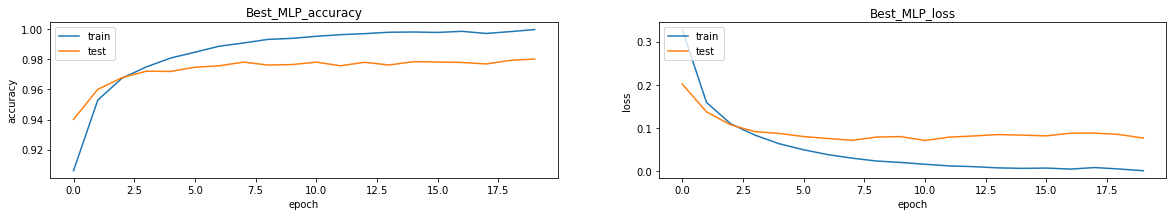

In [ ]:
plt.figure(figsize=(20,20))
###Grafico de accuracy
ax= plt.subplot(6,2,1)
plt.plot(historytanh2.history['accuracy'])
plt.plot(historytanh2.history['val_accuracy'])
plt.title('Best_MLP_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
###Grafico de loss
ax= plt.subplot(6,2,2)
plt.plot(historytanh2.history['loss'])
plt.plot(historytanh2.history['val_loss'])
plt.title('Best_MLP_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

### Tabla de métricas de rendimiento MLP

$$
\begin{aligned}
& \hspace{20mm} \text  {Tabla 1.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP) }
\\
&\begin{array}{cccc}
\hline \hline \text {     } & \text { ReLu } & \text { Tanh } & \text { Sigmoid } \\
\hline \hline \text {     } & \text { val_acc }\hspace{10mm}  { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } \\
\hline
\hline
\text{ 1 capa oculta } 
    & {0.9779} \hspace{15mm} {47s} & {0.9795} \hspace{15mm} {45s} & {0.9775} \hspace{15mm} {56s} \\
\text{ 2 capas ocultas } 
    & {0.9763} \hspace{15mm} {51s} & {0.9803} \hspace{15mm} {54s} & {0.9766} \hspace{15mm} {51s} \\
\text{ 3 capas ocultas } 
    & {0.9780} \hspace{15mm} {1m7s} & {0.9609} \hspace{15mm} {54s} & {0.9762} \hspace{15mm} {51s} \\
\hline
\hline
\end{array}
\end{aligned}
$$


### Conclusión modelos MLP



Al realizar los 3 modelos con sus distintas capas ocultas obtuvimos resultados algo esperables ya que el problema que nos plantea el dataset 'mnist' no es muy exigente, y podemos notarlo ya que no importa la función de activacion que usemos se obtienen resultados parecidos, lo que más podría variar es el tiempo ya que vemos que en la función de activación sigmoidal tiene un segundo o dos de retraso en comparación con las otras dos funciones de activación.

En general se obtuvieron buenos resultados y vemos que las 3 funciones de activación se desempeñaron de manera óptima. 

Cabe destacar que decidimos utilizar el modelo con función de activación Tanh y 2 capas ocultas, por lo que estaremos usando este modelo para modificar optimizadores, regularizadores entre otros.

## Parte 3. Backpropagation


Para lograr que la red neuronal funcione óptimamente y cumpla con los objetivos planteados es necesario ajustar una serie de hiper parámetros que nos irán permitiendo optimizar y ajustar los pesos de cada neurona e intentar bajar el error tanto como se pueda. Además cuando ejecutamos las redes neuronales ocurren una serie de funciones, ecuaciones y demás que no programamos ni ajustamos directamente pero ahí están para mejorar nuestros modelos. Uno de estos es el backpropagation que funciona en el ‘Backend’ de la red neuronal.

El algoritmo de backpropagation nos indica cuanto de *'culpa'* tiene cada neurona del error global cometido, la forma en como se calcula la *'culpa'* que tiene cada neurona en el error es lo que da sentido al nombre de backpropagation, ya que primeramente calcula la *'culpa'* del error de cada neurona de la última capa y lo va propagando hacia atrás para ver cuanta culta tienen el resto.

Se podría decir que pondera el reparto del error para cada una de las neuronas de la red.

El algoritmo de backpropagation determina la *'culpa'* del error, calculando las derivadas parciales de la función de coste con respecto a cada una de las variables.

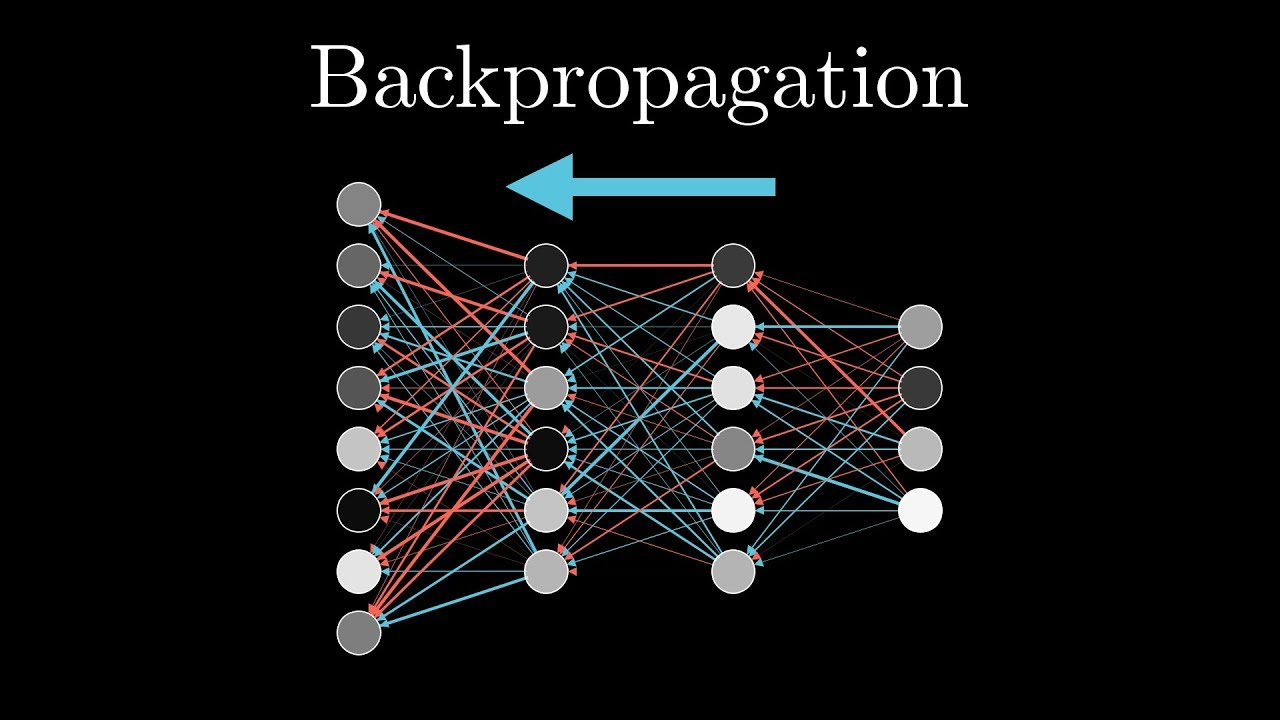

## Parte 4. Regularización del modelo

En este punto nos enfocamos en los regularizadores de dropout y L2 la razón de que ocupamos estos regularizadores es que el dropout omite neuronas aleatoriamente, y esto genera que el entrenamiento del modelo consuma menos recursos en proyectos de gran envergadura, la notoriedad en este proyecto en específico no es mucha ya que la cantidad de datos procesados no es excesiva y se ocupó L2 ,ya que la idea de este es reducir el valor de los parámetros para que sean pequeños cabe destacar que estos regularizadores no siempre funcionan para cualquier tipo de proyecto por eso es importante probar y evaluar estos.

El Early Stopping no fue utilizado ya que este no nos generó resultados positivos a la hora de ejecutar el entrenamiento y además el modelo realizado solo cuenta con 20 epócas, que son necesarias para su funcionamiento, en cambio el algoritmo Early Stopping podría ser utilizado en redes neuronales que tengan gran cantidad de épocas, por lo que para este modelo en concreto no fue necesario.


###Modelos

In [ ]:
#####################################################################
modelD = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
modelD.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
) 
start=time.time()
historyD = modelD.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    verbose=0,
)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutos = int(segundos / 60)
restante = segundos - (minutos * 60)
print(str(minutos) + " minuto y " + str(restante) + " segundos" ) 
#####################################################################

1 minuto y 10 segundos


In [ ]:
#####################################################################
modelL2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='tanh',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
modelL2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
) 
start=time.time()
historyL2 = modelL2.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    verbose=0,
)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutos = int(segundos / 60)
restante = segundos - (minutos * 60)
print(str(minutos) + " minuto y " + str(restante) + " segundos" ) 
#####################################################################

1 minuto y 6 segundos


### Visualización rendimiento de los distintos modelos regularizados 

In [ ]:
print("--------------------Modelo sin regularizador------------------------------")
print("Función de activación Tanh con 2 capas")
loss, val_acc = modeltanh2.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: 54 segundos")
print("--------------------Dropout-----------------------------------------------")
print("Función de activación Tanh con 2 capas y Dropout")
loss, val_acc = modelD.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: 1 minuto y 10 segundos") 
print("--------------------L2 (λ)------------------------------------------------")
print("Función de activación Tanh con 2 capas y L2")
loss, val_acc = modelL2.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: 1 minuto y 6 segundos")
print("--------------------------------------------------------------------------")

--------------------Modelo sin regularizador------------------------------
Función de activación Tanh con 3 capas
Pérdida: 0.0770
Precisión: 0.9803
Tiempo transcurrido: 54 segundos
--------------------Dropout-----------------------------------------------
Función de activación Tanh con 3 capas y Dropout
Pérdida: 0.0711
Precisión: 0.9782
Tiempo transcurrido: 1 minuto y 10 segundos
--------------------L2 (λ)------------------------------------------------
Función de activación Tanh con 3 capas y L2
Pérdida: 0.1834
Precisión: 0.9648
Tiempo transcurrido: 1 minuto y 6 segundos
--------------------------------------------------------------------------


### Tabla de métricas de rendimiento en modelos regularizados

$$
\begin{aligned}
& \hspace{25mm} \text  {Tabla Aplicando Regularización }\\
&\begin{array}{cccc}
\\
\hline \hline \text {     }\hspace{5mm} & \text  { Parámetro }\hspace{5mm}& \text { Val_acc }\hspace{5mm} \text { Loss }\\\hline
\text{ Primer resultado* } & { - } & {0.9803} & {0.0770}\\
\hline
\text{ Dropout (%) } & {0.3} & {0.9782} & {0.0711}\\
\text{ L2 (λ) } & {0.01} & {0.9648} & {0.1834}\\
\hline
\end{array}
\end{aligned}
$$

*Entrenamiento sin técnicas de regularización

### Conclusión regularización de los modelos

Nos encontramos que individualmente el que mejor resultó fue sin los parámetros asociados ya que con Dropout y L2 subía mucho el valor loss mientras que en el val_accuracy se mantienen muy cercanos los resultados. Por lo que no es un hiperparámetro muy necesario de agregar en este modelo en concreto.

Además el tiempo subió por lo que en terminos de eficiencia gana el modelo sin regularizadores.

## Parte 5. Optimización del modelo

En este punto veremos los resultados de los distintos optimizadores que se han utilizado para el proyecto de MNIST y visualizaremos cual fue el que mejor desempeño nos dió.

###Modelos

In [ ]:
#####################################################################
modelSGD = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
modelSGD.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(0.001),
    metrics=['accuracy'],
) 
start=time.time()
historySGD = modelSGD.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    verbose=0,
)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutos = int(segundos / 60)
restante = segundos - (minutos * 60)
print(str(minutos) + " minuto y " + str(restante) + " segundos" ) 
#####################################################################

0 minuto y 59 segundos


In [ ]:
#####################################################################
modelAdam = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
modelAdam.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
) 
start=time.time()
historyAdam = modelAdam.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    verbose=0,
)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutos = int(segundos / 60)
restante = segundos - (minutos * 60)
print(str(minutos) + " minuto y " + str(restante) + " segundos" ) 
#####################################################################

0 minuto y 55 segundos


In [ ]:
#####################################################################
modelRMSProp = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
modelRMSProp.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    metrics=['accuracy'],
) 
start=time.time()
historyRMSprop = modelRMSProp.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    verbose=0,
)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutos = int(segundos / 60)
restante = segundos - (minutos * 60)
print(str(minutos) + " minuto y " + str(restante) + " segundos" ) 
#####################################################################

1 minuto y 22 segundos


In [ ]:
#####################################################################
modelAdamax = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(128, activation='tanh'),
  tf.keras.layers.Dense(10,activation = 'softmax')
])
modelAdamax.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adamax(0.001),
    metrics=['accuracy'],
) 
start=time.time()
historyAdamax = modelAdamax.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    verbose=0,
)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutos = int(segundos / 60)
restante = segundos - (minutos * 60)
print(str(minutos) + " minuto y " + str(restante) + " segundos" ) 
#####################################################################

0 minuto y 51 segundos


### Visualización rendimiento de los distintos modelos y optimizadores

In [ ]:
print("--------------------Modelo base con SGD---------------------------------")
print("Función de activación Tanh con 2 capas")
loss, val_acc = modelSGD.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: 59 segundos")
print("--------------------Modelo base con Adam--------------------------------")
print("Función de activación Tanh con 2 capas")
loss, val_acc = modelAdam.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: 55 segundos") 
print("--------------------Modelo base con RMsProp-----------------------------")
print("Función de activación Tanh con 2 capas")
loss, val_acc = modelRMSProp.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: 1 minuto y 22 segundos")
print("--------------------Modelo base con Adamax------------------------------")
print("Función de activación Tanh con 2 capas")
loss, val_acc = modelAdamax.evaluate(ds_test,batch_size = 128,verbose=0)
print ("Pérdida: %.4f" % loss)
print ("Precisión: %.4f" % val_acc)
print("Tiempo transcurrido: 51 segundos")

--------------------Modelo base con SGD---------------------------------
Función de activación Tanh con 2 capas
Pérdida: 0.4165
Precisión: 0.8915
Tiempo transcurrido: 59 segundos
--------------------Modelo base con Adam--------------------------------
Función de activación Tanh con 2 capas
Pérdida: 0.0918
Precisión: 0.9781
Tiempo transcurrido: 55 segundos
--------------------Modelo base con RMsProp-----------------------------
Función de activación Tanh con 2 capas
Pérdida: 0.0940
Precisión: 0.9798
Tiempo transcurrido: 1 minuto y 22 segundos
--------------------Modelo base con Adamax------------------------------
Función de activación Tanh con 2 capas
Pérdida: 0.0692
Precisión: 0.9781
Tiempo transcurrido: 51 segundos


### Tabla y conclusiones de métricas de rendimiento comparando optimizadores

$$
\begin{aligned}
& \hspace{60mm} \text {Tabla 1.2. Comparando Optimizadores }\\
&\begin{array}{cccc}
\hline \hline \text {  N° Capas  } & \text { N° Épocas } & \text { SGD } & \text { ADAM } & \text { RMsProp } & \text { Adamax } \\
\hline \hline \text {    } & \text {  } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text{ Loss } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text { Loss }\\
\hline \text{ 2 capas } & \text { 20 epocas} & {0.8915 - 0.4165} & {0.9781 - 0.0918} & {0.9798 - 0.0940} & {0.9781 - 0.0692} & {} & {} & {} & {}\\
\hline
\end{array}
\end{aligned}
$$

La importancia de los optimizadores en las redes neuronales es crucial para obtener un buen resultado tanto en los valores de accuracy como de loss, sin embargo, en el dataset MNIST la diferencia entre los distintos optimizadores no es muy significativa, esto se debe a la poca carga que significa para su procesado y posterior modelado, aunque sin duda hay un optimizador utilizado que superó muy bien las pruebas y dió resultados bastante óptimos estamos hablando del optimizador Adamax. 

Además del  tiempo que tarda el modelo con este optimizador, provocando una ventaja sustancial.

## Parte 6. Redes Convolucionales



Las redes neuronales convolucionales, son algoritmos especializados para trabajar con imágenes tomando a estas como input sin la necesidad de ser transformadas asignándoles pesos a ciertos elementos en la imagen es uno de los principales algoritmos que ha contribuido en el desarrollo y perfeccionamiento enfocado en el campo de visión.


In [ ]:
#Torch
import torch
import torchvision
# Keras
import keras
from keras.callbacks import TensorBoard
from keras import initializers
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Input, Dropout

In [ ]:
#####################################################################
modelconv = tf.keras.models.Sequential()
#Primera capa
modelconv.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 activation='tanh',
                                 strides=1,
                                 input_shape=(28,28,1)
                                 ))
modelconv.add(tf.keras.layers.MaxPooling2D((2,2)))

#Segunda capa
modelconv.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 activation='tanh',
                                 strides=1,
                                 ))
modelconv.add(tf.keras.layers.MaxPooling2D((2,2)))

# Hacemos un flatten para poder usar una red fully connected
modelconv.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 activation='tanh',
                                 strides=1,
                                 ))
modelconv.add(tf.keras.layers.Flatten())

#Clasificación
modelconv.add(tf.keras.layers.Dense(10,activation='softmax'))

modelconv.compile(optimizer='Adamax',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

start=time.time()
historyconv=modelconv.fit(ds_train,
                  epochs=6,
                  validation_data=ds_test,
                  verbose=2)
end=time.time()
tiempo=end-start
segundos = int(tiempo)
minutos = int(segundos / 60)
restante = segundos - (minutos * 60)
print(str(minutos) + " minuto y " + str(restante) + " segundos" ) 
#####################################################################

Epoch 1/6
469/469 - 86s - loss: 0.3144 - accuracy: 0.9153 - val_loss: 0.1050 - val_accuracy: 0.9720 - 86s/epoch - 183ms/step
Epoch 2/6
469/469 - 85s - loss: 0.0932 - accuracy: 0.9735 - val_loss: 0.0647 - val_accuracy: 0.9826 - 85s/epoch - 181ms/step
Epoch 3/6
469/469 - 84s - loss: 0.0631 - accuracy: 0.9816 - val_loss: 0.0499 - val_accuracy: 0.9851 - 84s/epoch - 179ms/step
Epoch 4/6
469/469 - 84s - loss: 0.0492 - accuracy: 0.9858 - val_loss: 0.0404 - val_accuracy: 0.9874 - 84s/epoch - 178ms/step
Epoch 5/6
469/469 - 84s - loss: 0.0409 - accuracy: 0.9882 - val_loss: 0.0346 - val_accuracy: 0.9894 - 84s/epoch - 179ms/step
Epoch 6/6
469/469 - 84s - loss: 0.0351 - accuracy: 0.9897 - val_loss: 0.0315 - val_accuracy: 0.9892 - 84s/epoch - 180ms/step
12 minuto y 17 segundos


$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.3. Mejor resultado con Convolucional }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } &\hspace{6mm} \text { N° Kernel } & \text { Tamaño Kernel } & \text { Padding } & \text {  Pooling  } & \text { Stride } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 2 capas } & \text{ 6 épocas} & \text{1} & \text{3,3} & \text{valid} & \text{2,2} & \text{1} & \text{0.9892} & \text{0.0351}\\
\hline
\end{array}
\end{aligned}
$$



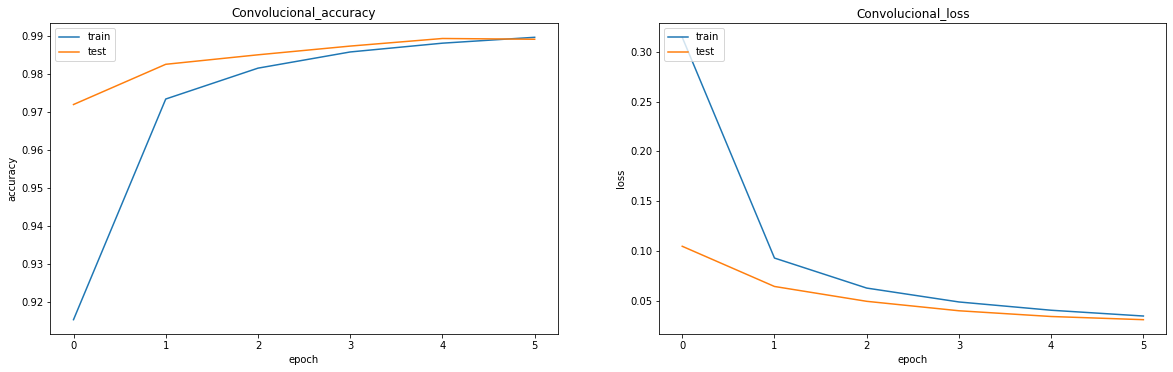

In [ ]:
plt.figure(figsize=(20,40))

###Grafico de accuracy
ax= plt.subplot(6,2,1)
plt.plot(historyconv.history['accuracy'])
plt.plot(historyconv.history['val_accuracy'])
plt.title('Convolucional_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
###Grafico de loss
ax= plt.subplot(6,2,2)
plt.plot(historyconv.history['loss'])
plt.plot(historyconv.history['val_loss'])
plt.title('Convolucional_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

Consideramos que por defecto CNN tiene más parámetros que ajustar, en cambio MLP no necesita muchos ajustes para funcionar, en principio. Claramente uno puede ir descubriendo y ajustando más parámetros con el tiempo, pero creemos que CNN requirió de mayor investigación y posterior aplicación para utilizar.

Si bien sabemos que la red CNN es mejor para la clasificación de imágenes, el tiempo y recursos para funcionar es demasiado, por lo que en casos como el de MNIST es mejor usar las redes MLP por su rapidez y sencillez.

Además tenemos que considerar todo el tiempo que tardó la red CNN en comparación con MLP.

## Parte 7. Detallar la segunda problemática de EducaDL: Redes Recurrentes Parte 1 


En este proyecto se nos presenta la problemática de automatizar un proceso de selección de comentarios negativos y positivos en Amazon, ya que al hacerlo de manera manual este problema requeriría de mucha inversión de tiempo implementando tecnologías enfocadas en redes recurrentes y de esta forma mantener actualizado el sistema.


In [ ]:
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from keras import initializers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Embedding, LSTM, SpatialDropout1D, Input, Dropout, SimpleRNN, Bidirectional
from keras.utils.np_utils import to_categorical
import re
from keras import layers

from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_amazon = pd.read_csv('/content/drive/MyDrive/4to Año/Deep Learning/Semana 11 y 12/5_AmazonComentarios.txt', sep=';', encoding='latin-1',header=None,names=['Valoracion','Comentario'])
df_amazon

,Valoracion,Comentario
0,Positivo,Stuning even for the non-gamer: This sound tra...
1,Positivo,The best soundtrack ever to anything.: I'm rea...
2,Positivo,Amazing!: This soundtrack is my favorite music...
3,Positivo,Excellent Soundtrack: I truly like this soundt...
4,Positivo,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
1448570,Negativo,Unbelievable- In a Bad Way: We bought this Tho...
1448571,Negativo,"Almost Great, Until it Broke...: My son reciev..."
1448572,Negativo,Disappointed !!!: I bought this toy for my son...
1448573,Positivo,Classic Jessica Mitford: This is a compilation...


In [ ]:
#Encodeo de la data
encoder = LabelEncoder()
df_amazon["Valoracion"] = encoder.fit_transform(df_amazon["Valoracion"])
#Selección al azar de una parte del dataset
df_amazon =  df_amazon.head(7000)
#Tokenizer
data= df_amazon[['Comentario']]
target= df_amazon[['Valoracion']]

data['Comentario'] = data['Comentario'].apply(lambda x: x.lower())
data['Comentario'] = data['Comentario'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
max_fatures = 1500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Comentario'].values)
X = tokenizer.texts_to_sequences(data['Comentario'].values)
X = pad_sequences(X)
#########################################################

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
######################################################################
#Red
embed_dim = 128
lstm_out = 196
modelAmazon = Sequential()
modelAmazon.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
modelAmazon.add(SpatialDropout1D(0.4))
modelAmazon.add(LSTM(lstm_out))
modelAmazon.add(Dense(2,activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001)
modelAmazon.compile(loss = 'categorical_crossentropy', optimizer=opt,metrics = ['accuracy'], )
print(modelAmazon.summary())
#Separación de la data
Y = pd.get_dummies(target['Valoracion']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
#Entrenamiento
batch_size = 128
historyAmazon=modelAmazon.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2,validation_data=(X_test,Y_test))
#####################################################################

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 30, 128)           192000    
                                                                 
 spatial_dropout1d_8 (Spatia  (None, 30, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_8 (LSTM)               (None, 196)               254800    
                                                                 
 dense_111 (Dense)           (None, 2)                 394       
                                                                 
Total params: 447,194
Trainable params: 447,194
Non-trainable params: 0
_________________________________________________________________
None
(4690, 30) (4690, 2)
(2310, 30) (2310, 2)
Epoch 1/10
37/37 - 16s - loss: 0.6728 - accuracy: 0.5883 - val_los

In [ ]:
print("Ingrese su comentario (En inglés):")
print("Ejemplo : 'It's just the product I ordered, 5 stars' ")
texto=[input("")]
texto=tokenizer.texts_to_sequences(texto)
texto= pad_sequences(texto,maxlen=30, dtype='int32', value=0)
feeling= modelAmazon.predict(texto,batch_size=1,verbose=2)[0]

if(np.argmax(feeling)==0):
  print("El comentario es negativo")
elif(np.argmax(feeling)==1):
  print("El comentario es positivo")

Ingrese su comentario (En inglés):
Ejemplo : 'It's just the product I ordered, 5 stars' 
Nice product
1/1 - 0s - 487ms/epoch - 487ms/step
El comentario es positivo


$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.4. Mejor resultado con Recurrente Amazon }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 2 capas } & \text{ 5 épocas} & \text{128} & \text{Dropout} & \text{Adam}  & \text{Softmax} & \text{0.7026} & \text{0.2466}\\
\hline
\end{array}
\end{aligned}
$$



**Diferencias entre redes neuronales MLP Y RNN**

Las redes neuronales recurrentes a diferencia de las redes multicapa no funcionan con una estructura basada en capas y sus conexiones son arbitrarias entre las neuronas, incluso entre ellas se pueden crear ciclos de esta forma se genera la temporalidad dejando que este tipo de redes tengan memoria.

En palabras más simples, la arquitectura de redes RNN se van conectando de unas a otras y se puede generar un ciclo de forma arbitraria mientras que las MLP están interconectadas unas a otras desde la capa de entrada, capas ocultas y capas de salida.

## Parte 8.  Detallar la tercera problemática de EducaDL: Redes Recurrentes Parte 2.


En este proyecto, se nos entrega la problemática de analizar los comentarios de un dataset enfocado en la empresa de Twitter. Utilizaremos redes recurrentes para poder predecir si el comentario es positivo o negativo, de esta forma en un futuro la empresa podrá investigar o analizar las respuestas de la población dependiendo de los temas hablados en la plataforma.

El porqué utilizamos redes recurrentes es por que estas son conocidas por su capacidad de obtener información de datos secuenciales guardando estos datos en memoria para predecir el comportamiento de los datos 

En este caso en particular, el impacto de análisis de sentimientos o tipos de datos que se puede generar mediante los comentarios puede generar un gran impacto para predecir las decisiones de la población según su zona. La utilización o enfoque de los datos según la problemática que se puede resolver puede cambiar el enfoque de un proyecto y darle diferentes valores según lo deseado.

In [ ]:
df_twets = pd.read_csv('/content/drive/MyDrive/4to Año/Deep Learning/Semanas siguientes RNN/2_TweetsClasificacion_EX3.txt', sep=';', encoding='latin-1',header=None,names=['Valoracion','Comentario'])
df_twets

,Valoracion,Comentario
0,Positivo,I LOVE u guys r the best!! http://bkite.com/0...
1,Positivo,im meeting up with one of my besties tonight! ...
2,Positivo,"Thanks for the Twitter add, Sunisa! I got to m..."
3,Positivo,Being sick can be really cheap when it hurts t...
4,Positivo,he has that effect on everyone
...,...,...
1599993,Negativo,Tried to get the mutant Fawkes to follow me bu...
1599994,Negativo,Sick Spending my day laying in bed listening ...
1599995,Negativo,Gmail is down?
1599996,Negativo,rest in peace Farrah! So sad


In [ ]:
#Encodeo de la data
encoder = LabelEncoder()
df_twets["Valoracion"] = encoder.fit_transform(df_twets["Valoracion"])
#Selección al azar de una parte del dataset
df_twets =  df_twets.sample(7000)
#Tokenizer
data= df_twets[['Comentario']]
target= df_twets[['Valoracion']]
data['Comentario'] = data['Comentario'].apply(lambda x: x.lower())
data['Comentario'] = data['Comentario'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
max_fatures = 1500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['Comentario'].values)
X = tokenizer.texts_to_sequences(data['Comentario'].values)
X = pad_sequences(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
######################################################################
#Red
embed_dim = 128
lstm_out = 196
modelTwitter = Sequential()
modelTwitter.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
modelTwitter.add(SpatialDropout1D(0.4))
modelTwitter.add(LSTM(lstm_out))
modelTwitter.add(Dense(2,activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001)
modelTwitter.compile(loss = 'categorical_crossentropy', optimizer=opt,metrics = ['accuracy'], )
print(modelTwitter.summary())
#Separación de la data
Y = pd.get_dummies(target['Valoracion']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
#Entrenamiento
batch_size = 128
historyTwitter=modelTwitter.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2,validation_data=(X_test,Y_test))
#####################################################################

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 30, 128)           192000    
                                                                 
 spatial_dropout1d_10 (Spati  (None, 30, 128)          0         
 alDropout1D)                                                    
                                                                 
 lstm_10 (LSTM)              (None, 196)               254800    
                                                                 
 dense_113 (Dense)           (None, 2)                 394       
                                                                 
Total params: 447,194
Trainable params: 447,194
Non-trainable params: 0
_________________________________________________________________
None
(4690, 30) (4690, 2)
(2310, 30) (2310, 2)
Epoch 1/10
37/37 - 63s - loss: 0.6703 - accuracy: 0.5881 - val_los

In [ ]:
print("Ingrese su comentario (En inglés):")
print("Ejemplo : 'Nice Tweet' ")
texto=[input("")]
texto=tokenizer.texts_to_sequences(texto)
texto= pad_sequences(texto,maxlen=30, dtype='int32', value=0)
feeling= modelTwitter.predict(texto,batch_size=1,verbose=2)[0]

if(np.argmax(feeling)==0):
  print("El comentario es negativo")
elif(np.argmax(feeling)==1):
  print("El comentario es positivo")

Ingrese su comentario (En inglés):
Ejemplo : 'Nice Tweet' 
Bad Tweet
1/1 - 0s - 21ms/epoch - 21ms/step
El comentario es negativo


$$
\begin{aligned}
& \hspace{80mm} \text {Tabla 1.5. Mejor resultado con Recurrente Twitter }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } & \text {  N° Épocas  } & \text {  Batch size  }  &\hspace{6mm} \text { Técnica de regularización } & \text { Optimizador}  & \text { Función de salida} & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 2 capas } & \text{10 épocas} & \text{128} & \text{Dropout} & \text{Adam}  & \text{Softmax} & \text{0.6905} & \text{0.2444}\\
\hline
\end{array}
\end{aligned}
$$



## Parte 9. Implementación Arquitecturas Especializadas

Si tuviéramos que implementar un futuro proyecto con redes especializadas y generar una solución en EducaDL podríamos recurrir al estudio de distintos formularios hechos por personas especializadas para analizar el estado psicológico de niños y dependiendo de sus resultados reforzar las necesidades y ayudarles este proyecto se podría ampliar incluso fuera del ámbito de la enseñanza.
Los beneficios que podría traer un proyecto de esta envergadura nos podrían facilitar el conocer el estado del niño y adaptar de qué forma enseñar según las necesidades y la utilidad de conocer estos datos de la persona puede generar distintos tipos de enseñanzas personalizadas.
